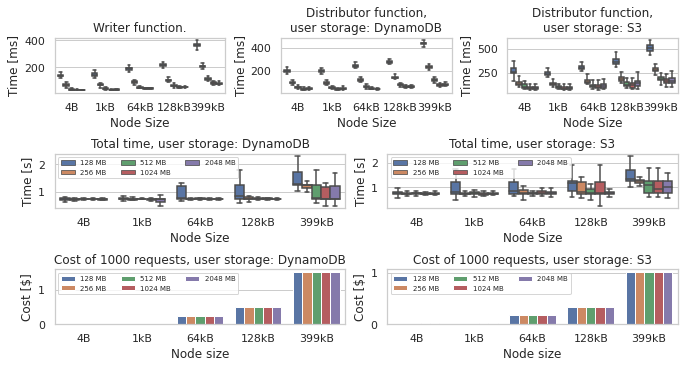

In [164]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from os.path import join, pardir

DATA_DIR = join(pardir, pardir, 'data', 'read')

#sns.set(rc={'figure.figsize':(16,8)})
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style("whitegrid")

fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3,8)
writer = fig3.add_subplot(gs[0, 1:3])
distr1 = fig3.add_subplot(gs[0, 3:5])
distr2 = fig3.add_subplot(gs[0,5:7])
time1 = fig3.add_subplot(gs[1, 1:4])
time2 = fig3.add_subplot(gs[1, 4:7])
cost1 = fig3.add_subplot(gs[2,1:4])
cost2 = fig3.add_subplot(gs[2,4:7])
#f3_ax1.set_title('gs[0, :]')
#f3_ax2 = fig3.add_subplot(gs[1, :-1])
#f3_ax2.set_title('gs[1, :-1]')
#f3_ax3 = fig3.add_subplot(gs[1:, -1])
#f3_ax3.set_title('gs[1:, -1]')
#f3_ax4 = fig3.add_subplot(gs[-1, 0])
#f3_ax4.set_title('gs[-1, 0]')
#f3_ax5 = fig3.add_subplot(gs[-1, -2])
#f3_ax5.set_title('gs[-1, -2]')

penguins = sns.load_dataset("penguins")

tips = sns.load_dataset("tips")
# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="time",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df.loc[dynamo_df['function']=='writer'], ax=writer,showfliers=False)

handles, labels = g.get_legend_handles_labels()
g.legend().set_visible(False)
#(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
g.set_xlabel('Node Size',fontsize=12)
g.set_ylabel('Time [ms]',fontsize=12)
g.set_title('Writer function.', fontsize=12)

# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="time",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df.loc[dynamo_df['function']=='distributor'], ax=distr1,showfliers=False)
handles, labels = g.get_legend_handles_labels()
g.legend().set_visible(False)

#g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
g.set_xlabel('Node Size',fontsize=12)
g.set_ylabel('Time [ms]',fontsize=12)
g.set_title('Distributor function,\nuser storage: DynamoDB', fontsize=12)

# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="time",
            hue="memory", #palette=["m", "g"],
            data=s3_df.loc[s3_df['function']=='distributor'], ax=distr2,showfliers=False)
handles, labels = g.get_legend_handles_labels()
g.legend().set_visible(False)
#g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
g.set_xlabel('Node Size',fontsize=12)
g.set_ylabel('Time [ms]',fontsize=12)
g.set_title('Distributor function,\nuser storage: S3', fontsize=12)

# Draw a nested barplot by species and sex
dynamo_df_client['data']/=1000.0
g = sns.boxplot(x="size", y="data",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df_client.loc[dynamo_df_client['op']=='set_data'], ax=time1,showfliers=False)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=3) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
g.set_xlabel('Node Size',fontsize=12)
g.set_ylabel('Time [s]',fontsize=12)
g.set_title('Total time, user storage: DynamoDB', fontsize=12)

s3_df_client['data']/=1000.0
# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="data",
            hue="memory", #palette=["m", "g"],
            data=s3_df_client.loc[s3_df_client['op']=='set_data'], ax=time2,showfliers=False)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=3) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
g.set_xlabel('Node Size',fontsize=12)
g.set_ylabel('Time [s]',fontsize=12)
g.set_title('Total time, user storage: S3', fontsize=12)


# Draw a nested barplot by species and sex
#g = sns.boxplot(x="size", y="total_cost",
#            hue="memory", #palette=["m", "g"],
#            data=dynamo_df.loc[dynamo_df['op']=='set_data'], ax=cost1,showfliers=False)
#handles, labels = g.get_legend_handles_labels()
#g.legend(handles, [f"{m} MB" for m in labels], fontsize=10, ncol=3) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
#g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
#g.set_xlabel('Node Size',fontsize=14)
#g.set_ylabel('Time [ms]',fontsize=14)
#g.set_title('Total time, user storage: DynamoDB', fontsize=14)


g = sns.barplot(x="size", y="cost",
            hue="memory", #palette=["m", "g"],
            data=df_costs, ax=cost1)#,showfliers=False)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=3) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
g.set_xlabel('Node size',fontsize=12)
g.set_ylabel('Cost [$]',fontsize=12)
g.set_title('Cost of 1000 requests, user storage: DynamoDB', fontsize=12)

# Draw a nested barplot by species and sex
g = sns.barplot(x="size", y="cost",
            hue="memory", #palette=["m", "g"],
            data=s3_costs, ax=cost2)#,showfliers=False)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=3) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
g.set_xlabel('Node size',fontsize=12)
g.set_ylabel('Cost [$]',fontsize=12)
g.set_title('Cost of 1000 requests, user storage: S3', fontsize=12)


plt.savefig("plot.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

In [3]:

DATA_DIR = join(pardir, pardir, 'data', 'write')

dfs = []
dfs2 = []
for mem in [128, 256, 512, 1024, 2048]:
    
    for size in [4, 1024, 65536, 131072, 408576]:
        df = pd.read_csv(join(DATA_DIR, f'dynamo_{size}_{mem}_processed.csv'), index_col=0)
        df['size'] = size / 1024
        
        # data is broken :-(
        df = df.loc[df['memory'] == mem]
        df = df.groupby(['memory', 'function']).head(100).reset_index(drop=True)
        if df.shape[0] > 200:
            print(size, mem)
        dfs.append(df)
        
        
        df = pd.read_csv(join(DATA_DIR, f'dynamo_{size}_{mem}.csv'), index_col=0)
        df = df.groupby(['memory', 'size']).head(100).reset_index(drop=True)
        df['size'] = size / 1024
        df.loc[df['op'] == 'set_data', 'data'] /= 1000
        dfs2.append(df)

dynamo_df = pd.concat(dfs)
dynamo_df['system'] = 'dynamo'
dynamo_df_client = pd.concat(dfs2)
dynamo_df_client['system'] = 'dynamo'
print(dynamo_df_client)

DATA_DIR = join(pardir, pardir, 'data', 'write_persistent')
dfs = []
dfs2 = []
for mem in [128, 256, 512, 1024, 2048]:
    
    for size in [4, 1024, 65536, 131072, 408576]:
        df = pd.read_csv(join(DATA_DIR, f'dynamo_{size}_{mem}_processed.csv'), index_col=0)
        df = df.loc[df['memory'] == mem]
        #print(mem, size, df.shape[0])
        df = df.groupby(['memory', 'function']).head(100).reset_index(drop=True)
        #print(mem, size, df.shape[0])
        if df.shape[0] > 200:
            print(size, mem)
        df['size'] = size / 1024
        dfs.append(df)

        df = pd.read_csv(join(DATA_DIR, f'dynamo_{size}_{mem}.csv'), index_col=0)
        #df = df.loc[df['memory'] == mem]
        df = df.groupby(['memory', 'size']).head(100).reset_index(drop=True)
        #if df.shape[0] > 100:
        #    print(size, mem)
        df['size'] = size / 1024
        df.loc[df['op'] == 'set_data', 'data'] /= 1000
        dfs2.append(df)

s3_df = pd.concat(dfs)
s3_df['system'] = 's3'
print(s3_df.loc[s3_df['function'] == 'distributor'])
s3_df_client = pd.concat(dfs2)
s3_df_client['system'] = 's3'
print(s3_df_client)



       data  client_write_data        op  memory        size  system
0   656.267             8329.0  set_data     128    0.003906  dynamo
1   779.890             7350.0  set_data     128    0.003906  dynamo
2   739.844             7422.0  set_data     128    0.003906  dynamo
3   741.406             7783.0  set_data     128    0.003906  dynamo
4   738.485             7060.0  set_data     128    0.003906  dynamo
..      ...                ...       ...     ...         ...     ...
95  754.145            28042.0  set_data    2048  399.000000  dynamo
96  725.217            33368.0  set_data    2048  399.000000  dynamo
97  736.295            31068.0  set_data    2048  399.000000  dynamo
98  762.498            30592.0  set_data    2048  399.000000  dynamo
99  761.698            30060.0  set_data    2048  399.000000  dynamo

[2500 rows x 6 columns]
                                  request    time  billed_time  memory  \
100  0c38a7c9-c00f-4641-9de3-c62e39ea047f  171.65          172     128   

In [5]:
# cost compute
# DynamoDB
dynamodb_r_cost = 0.25 / 10**6
dynamodb_w_cost = 1.25 / 10**6

dynamodb_stream = 0.02 / 100000

request_cost = 0.20 / 10**6
# per mb-second
duration_cost = 0.0000166667
# dynamodb cost
import numpy as np
requests = 1000

dynamo_df['compute_cost'] = dynamo_df['billed_time'] * dynamo_df['memory'] * (duration_cost / 1000) / 1024.0
dynamo_df['compute_cost_dollar'] = dynamo_df['compute_cost']  * requests

# push to queue + 2 locks + 1 counter + 1 system storage
writer_function = dynamo_df.loc[dynamo_df['function'] == 'writer']
dynamo_df.loc[dynamo_df['function'] == 'writer', 'database_cost'] = 3 + 1 + np.ceil(writer_function['size'])
dynamo_df.loc[dynamo_df['function'] == 'writer', 'database_cost_dollar'] = (3 + 1 + np.ceil(writer_function['size']))*dynamodb_w_cost*requests

# 1 write to storage
distributor_function = dynamo_df.loc[dynamo_df['function'] == 'distributor']
dynamo_df.loc[dynamo_df['function'] == 'distributor', 'database_cost'] = np.ceil(distributor_function['size'])
dynamo_df.loc[dynamo_df['function'] == 'distributor', 'database_cost_dollar'] = np.ceil(distributor_function['size'])*dynamodb_w_cost*requests

#df['database_cost'] = df['cost'] * dynamodb_r_cost
# convert to cents
# 1k requests
dynamo_df['requests_costs'] = request_cost * requests
dynamo_df['stream_cost'] = dynamodb_stream * 2 * requests + np.ceil(dynamo_df['size'])*dynamodb_w_cost*requests
dynamo_df['total_cost'] = dynamo_df['compute_cost_dollar'] + dynamo_df['database_cost_dollar']
dynamo_df['other_cost'] =  dynamo_df['stream_cost'] + dynamo_df['requests_costs']

print(dynamo_df)

#df['total_cost'] *= 100

costs = []
for mem in [128, 256, 512, 1024, 2048]:
    
    for size in [4, 1024, 65536, 131072, 408576]:
        size /=1024.0
        #df = pd.read_csv(join(DATA_DIR, f'dynamo_{size}_{mem}_processed.csv'), index_col=0)
        #df = df.loc[df['memory'] == mem]
        #print(mem, size, df.shape[0])
        #df = df.groupby(['memory', 'function']).head(100).reset_index(drop=True)
        x = dynamo_df.loc[(dynamo_df['memory'] == mem) & (dynamo_df['size'] == size)]
        x1 = x.groupby(['function'])
        print([size, mem, x1['total_cost'].mean()['distributor'], x1['total_cost'].mean()['writer'],  request_cost * requests +  dynamodb_stream * 2 * requests])
        
        costs.append([size, mem, x1['total_cost'].mean()['distributor'] + x1['total_cost'].mean()['writer'] +  request_cost * requests +  x1['stream_cost'].mean()['writer']])
        #costs.append([size, mem, ])
        #print(x)
df_costs = pd.DataFrame(data=costs, columns=['size', 'memory', 'cost'])
print(df_costs)


                                  request    time  billed_time  memory  \
0    fc98551f-e1e2-42f3-9914-bf46734193fd  131.91          132     128   
1    4b2b15c6-d155-496b-859c-754988da0edb  129.98          130     128   
2    90ac8122-0e88-444e-ae8e-d911bc9925da  145.27          146     128   
3    59c2ed15-5a4e-407d-b6ac-ede095567193  127.30          128     128   
4    0ec8a976-18c1-4de7-8cd9-c720bc7292b4  137.49          138     128   
..                                    ...     ...          ...     ...   
195  c64b8c06-297d-43e9-89f5-fc3177fe9b06   85.38           86    2048   
196  c264ec44-b05f-47a9-b888-23f4df13d3b6  111.44          112    2048   
197  dd740296-b652-4880-a809-3fd8559ce0d5   86.51           87    2048   
198  dbf0d3e0-b219-4e65-8e42-a236331ab2e0   90.36           91    2048   
199  be35527d-5775-427d-a6bf-a2c7ff7e5c56   78.13           79    2048   

     used_memory                                  read  write     function  \
0             82  fc98551f-e1e2-4

In [6]:
# cost compute
# S3
s3_r_cost = 0.0004 / 1000
s3_w_cost = 0.005 / 1000
dynamodb_r_cost = 0.25 / 10**6
dynamodb_w_cost = 1.25 / 10**6

dynamodb_stream = 0.02 / 100000

request_cost = 0.20 / 10**6
# per mb-second
duration_cost = 0.0000166667
# dynamodb cost
import numpy as np
s3_df['compute_cost'] = s3_df['billed_time'] * s3_df['memory'] * (duration_cost / 1000) / 1024.0
s3_df['compute_cost_dollar'] = s3_df['compute_cost']  * requests

requests = 1000

# push to queue + 2 locks + 1 counter + 1 system storage
writer_function = s3_df.loc[s3_df['function'] == 'writer']
s3_df.loc[s3_df['function'] == 'writer', 'database_cost'] = 3 + 1 + np.ceil(writer_function['size'])
s3_df.loc[s3_df['function'] == 'writer', 'database_cost_dollar'] = (3 + 1 + np.ceil(writer_function['size']))*dynamodb_w_cost*requests
# 1 write to storage
distributor_function = s3_df.loc[s3_df['function'] == 'distributor']
# we read one, we write one
s3_df.loc[s3_df['function'] == 'distributor', 'database_cost'] = s3_r_cost + s3_w_cost
s3_df.loc[s3_df['function'] == 'distributor', 'database_cost_dollar'] = (s3_r_cost + s3_w_cost)*requests

#df['database_cost'] = df['cost'] * dynamodb_r_cost
# convert to cents
# 1k requests
# pushing to queue
#s3_df['total_cost'] += np.ceil(s3_df['size']) * requests * dynamodb_w_cost
# lambda invocation
s3_df['requests_costs'] = request_cost * requests
# dynamodb streams
s3_df['stream_cost'] = dynamodb_stream * 2 * requests + np.ceil(s3_df['size'])*dynamodb_w_cost*requests
s3_df['total_cost'] = s3_df['compute_cost_dollar'] + s3_df['database_cost_dollar']
s3_df['other_cost'] =  s3_df['stream_cost'] + s3_df['requests_costs']

print(s3_df)

#df['total_cost'] *= 100

costs = []
for mem in [128, 256, 512, 1024, 2048]:
    
    for size in [4, 1024, 65536, 131072, 408576]:
        size /=1024.0
        #df = pd.read_csv(join(DATA_DIR, f'dynamo_{size}_{mem}_processed.csv'), index_col=0)
        #df = df.loc[df['memory'] == mem]
        #print(mem, size, df.shape[0])
        #df = df.groupby(['memory', 'function']).head(100).reset_index(drop=True)
        x = s3_df.loc[(s3_df['memory'] == mem) & (s3_df['size'] == size)]
        x1 = x.groupby(['function'])
        costs.append([size, mem, x1['total_cost'].mean()['distributor'] + x1['total_cost'].mean()['writer'] +  request_cost * requests +  x1['stream_cost'].mean()['writer'] ])
        #costs.append([size, mem, ])
        #print(x)
s3_costs = pd.DataFrame(data=costs, columns=['size', 'memory', 'cost'])
print(s3_costs)

                                  request    time  billed_time  memory  \
0    44b1e3d1-6b66-482a-a88b-46fa939b2d82  124.38          125     128   
1    d1d88066-43c8-4eb9-a45e-dcc1672aeb48  154.23          155     128   
2    7e21dd7d-bc6c-4295-b741-cb6795f13315  147.57          148     128   
3    34f9ad1c-ec3c-4bcc-b7d1-ddcfcdb800a0  159.76          160     128   
4    0618a188-706a-4809-92f4-7edab9c783df  139.95          140     128   
..                                    ...     ...          ...     ...   
195  c63e58a7-e0bc-4326-ad0b-cc6a05847d70  169.00          169    2048   
196  4725f001-5637-43ff-8163-f09b8b507a1e  270.59          271    2048   
197  4b490eeb-ff07-4e59-8cd1-254f86c5977c  351.04          352    2048   
198  22699564-dae5-41d2-98d5-46852c168cb2  187.09          188    2048   
199  7b9b641d-e073-4b7c-9869-cee5ada0106d  805.51          806    2048   

     used_memory                                  read  write     function  \
0             88  44b1e3d1-6b66-4

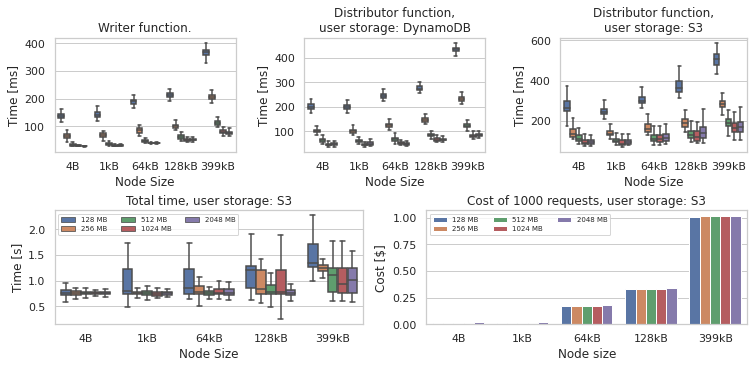

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from os.path import join, pardir

DATA_DIR = join(pardir, pardir, 'data', 'read')

#sns.set(rc={'figure.figsize':(16,8)})
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style("whitegrid")

fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(2,8)
writer = fig3.add_subplot(gs[0, 1:3])
distr1 = fig3.add_subplot(gs[0, 3:5])
distr2 = fig3.add_subplot(gs[0,5:7])
time1 = fig3.add_subplot(gs[1, 1:4])
time2 = fig3.add_subplot(gs[1, 4:7])
#cost1 = fig3.add_subplot(gs[2,1:4])
#cost2 = fig3.add_subplot(gs[2,4:7])
#f3_ax1.set_title('gs[0, :]')
#f3_ax2 = fig3.add_subplot(gs[1, :-1])
#f3_ax2.set_title('gs[1, :-1]')
#f3_ax3 = fig3.add_subplot(gs[1:, -1])
#f3_ax3.set_title('gs[1:, -1]')
#f3_ax4 = fig3.add_subplot(gs[-1, 0])
#f3_ax4.set_title('gs[-1, 0]')
#f3_ax5 = fig3.add_subplot(gs[-1, -2])
#f3_ax5.set_title('gs[-1, -2]')

penguins = sns.load_dataset("penguins")

tips = sns.load_dataset("tips")
# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="time",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df.loc[dynamo_df['function']=='writer'], ax=writer,showfliers=False)

handles, labels = g.get_legend_handles_labels()
g.legend().set_visible(False)
#(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
g.set_xlabel('Node Size',fontsize=12)
g.set_ylabel('Time [ms]',fontsize=12)
g.set_title('Writer function.', fontsize=12)

# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="time",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df.loc[dynamo_df['function']=='distributor'], ax=distr1,showfliers=False)
handles, labels = g.get_legend_handles_labels()
g.legend().set_visible(False)

#g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
g.set_xlabel('Node Size',fontsize=12)
g.set_ylabel('Time [ms]',fontsize=12)
g.set_title('Distributor function,\nuser storage: DynamoDB', fontsize=12)

# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="time",
            hue="memory", #palette=["m", "g"],
            data=s3_df.loc[s3_df['function']=='distributor'], ax=distr2,showfliers=False)
handles, labels = g.get_legend_handles_labels()
g.legend().set_visible(False)
#g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
g.set_xlabel('Node Size',fontsize=12)
g.set_ylabel('Time [ms]',fontsize=12)
g.set_title('Distributor function,\nuser storage: S3', fontsize=12)


s3_df_client['data']/=1000.0
# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="data",
            hue="memory", #palette=["m", "g"],
            data=s3_df_client.loc[s3_df_client['op']=='set_data'], ax=time1,showfliers=False)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=3) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
g.set_xlabel('Node Size',fontsize=12)
g.set_ylabel('Time [s]',fontsize=12)
g.set_title('Total time, user storage: S3', fontsize=12)


# Draw a nested barplot by species and sex
#g = sns.boxplot(x="size", y="total_cost",
#            hue="memory", #palette=["m", "g"],
#            data=dynamo_df.loc[dynamo_df['op']=='set_data'], ax=cost1,showfliers=False)
#handles, labels = g.get_legend_handles_labels()
#g.legend(handles, [f"{m} MB" for m in labels], fontsize=10, ncol=3) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
#g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
#g.set_xlabel('Node Size',fontsize=14)
#g.set_ylabel('Time [ms]',fontsize=14)
#g.set_title('Total time, user storage: DynamoDB', fontsize=14)


# Draw a nested barplot by species and sex
g = sns.barplot(x="size", y="cost",
            hue="memory", #palette=["m", "g"],
            data=s3_costs, ax=time2)#,showfliers=False)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=3) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
g.set_xlabel('Node size',fontsize=12)
g.set_ylabel('Cost [$]',fontsize=12)
g.set_title('Cost of 1000 requests, user storage: S3', fontsize=12)


plt.savefig("plot_small.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)